In [10]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("microsoft_stock.csv",parse_dates=["Date"],index_col="Date")
#https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis

In [4]:
print(df.head())
print(df.info())

                      Open   High    Low  Close    Volume
Date                                                     
2015-04-01 16:00:00  40.60  40.76  40.31  40.72  36865322
2015-04-02 16:00:00  40.66  40.74  40.12  40.29  37487476
2015-04-06 16:00:00  40.34  41.78  40.18  41.55  39223692
2015-04-07 16:00:00  41.61  41.91  41.31  41.53  28809375
2015-04-08 16:00:00  41.48  41.69  41.04  41.42  24753438
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB
None


In [5]:
y=df["Close"]

<Axes: title={'center': 'Microsoft Stock Price'}, xlabel='Date', ylabel='Price in $'>

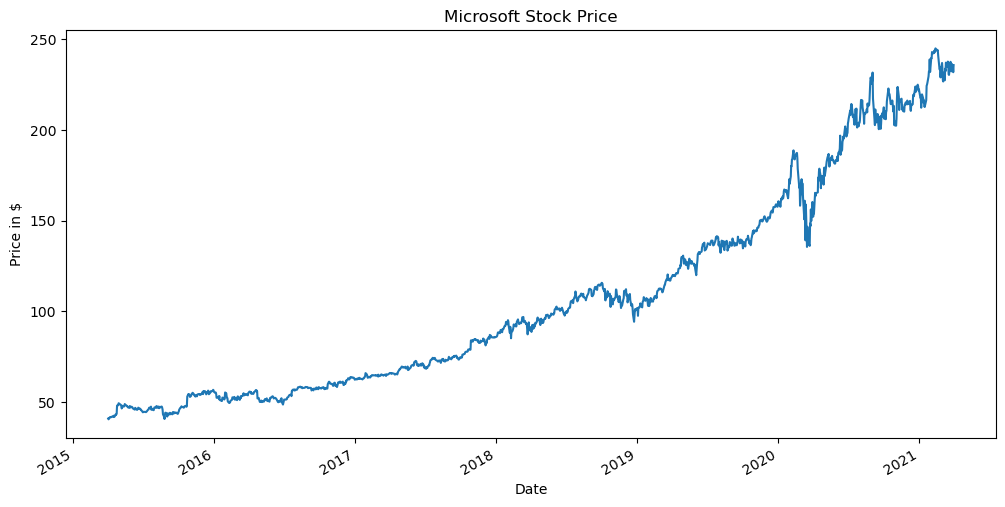

In [ ]:
#plol closing price
y.plot(figsize=(12,6),title="Microsoft Stock Price",ylabel="Price in $",xlabel="Date")

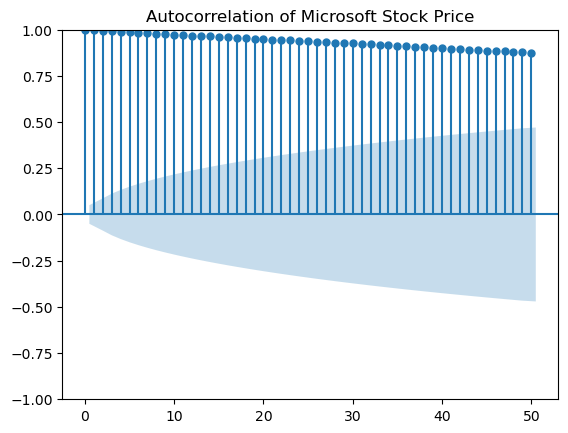

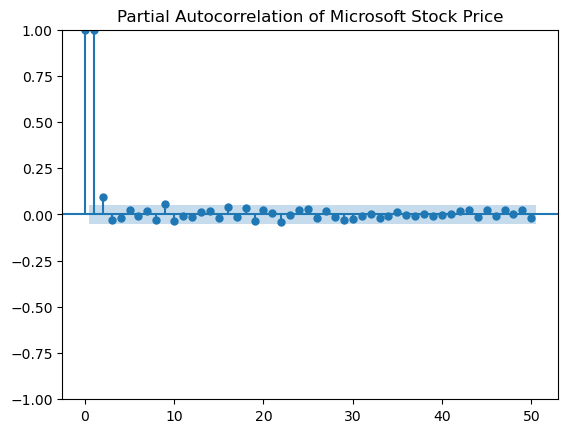

In [11]:
#---Autocorrelation and Partial Autocorrelation Plots---
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y, lags=50, title="Autocorrelation of Microsoft Stock Price")
plot_pacf(y, lags=50, title="Partial Autocorrelation of Microsoft Stock Price")
plt.show()

Statistically significat lags are found up to the 10th lag (10 days)

In [12]:
#--- ADF stationarity test ---
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.737136289927098
p-value: 0.9982158366942122


In [ ]:
#differentiation to make series stationary
y=y.diff()

In [20]:
y.iloc[0:1,]
#first value is NaN after differencing, so we drop it
y=y.dropna()

In [28]:
result = adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.038331065146412
p-value: 1.5195939917530848e-17


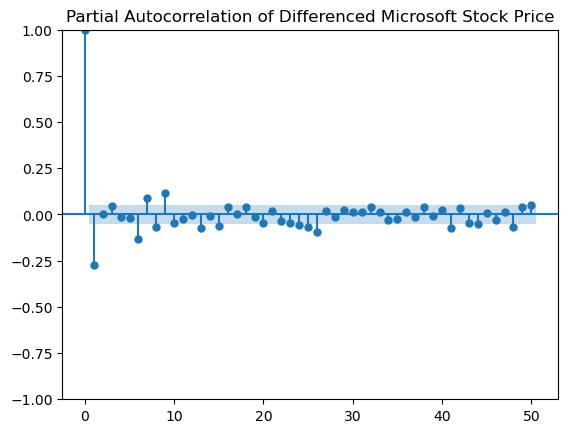

In [29]:
plot_pacf(y, lags=50, title="Partial Autocorrelation of Differenced Microsoft Stock Price")
plt.show()

In [30]:
# Assume last 12 months as test set
train = df.iloc[:-12]
test = df.iloc[-12:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1499, 5)
Test shape: (12, 5)


In [31]:
# ---ARIMA model ---

In [32]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train["Close"], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1499
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3346.026
Date:                Wed, 02 Jul 2025   AIC                           6698.052
Time:                        11:00:13   BIC                           6713.987
Sample:                             0   HQIC                          6703.989
                               - 1499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.036     -8.776      0.000      -0.391      -0.248
ma.L1          0.0495      0.039      1.269      0.205      -0.027       0.126
sigma2         5.1008      0.073     69.459      0.0

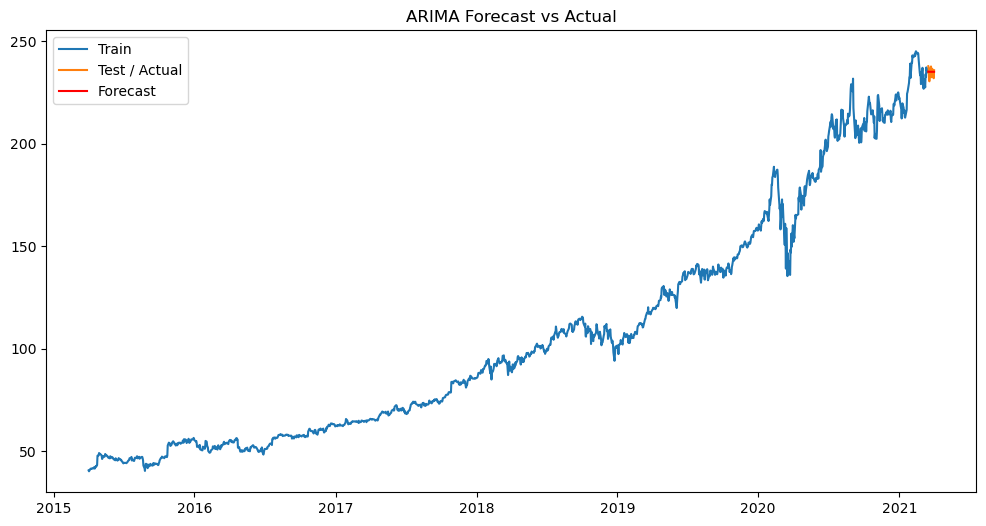

In [35]:
#--- forecast ---
forecast = model_fit.forecast(steps=12)
forecast.index = test.index

# Plot actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test / Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [33]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mae = mean_absolute_error(test['Close'], forecast)
rmse = np.sqrt(mean_squared_error(test['Close'], forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 2.17
RMSE: 2.56
